<img align="left" width="30%" style="padding-right:10px;" src="Images/Ccom.png">

___
# Review of Linear Algebra
## 1 Introduction
<br>
Original Linear Algebra text and in text examples:
**David E. Wells, Kresho Frankich, 1994

Minor additional notes and edits: Semme J. Dijkstra, 2022<br>
Additional examples: Semme J. Dijkstra, 2022<br>
Jupyter Notebook Implementation: Semme J. Dijkstra, 2022<br>
Python code and explanations: Semme J. Dijkstra, 2022

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a><br><br> 

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from my_code.latex_output import display_matrix
from my_code.boat import boat
%matplotlib notebook
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$
    
$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
</div>

___
## 1. Introduction

Linear algebra is a recently developed branch of mathematics. While some of the concepts, such as the determinant, are almost three hundred years old., it was only in 1850 that the concept of a matrix was developed. Cayley soon showed that linear transformations can be represented by matrices, and developed the rules for matrix multiplication and inversion. Hamilton developed the concept of a vector space, and the major foundations for modern linear algebra were in place.
 
Linear algebra deals with problems that can be formulated in terms of linear equations. A linear equation in two or more variables contains no products between the variables, or powers of the variables beyond the first power. The term *linear* comes from the fact that the graph of a linear equation in two variables $x, y$ is a straighy *line* in the $xy$ plane. This is one example of the strong connection between *geometry* and linear algebra.



___
### 1. Self Study Exercise 1

Give a sample of a linear equation in $x,y$ using the variables `x` and `y` and plot its graph to confirm that it is a straight line. 

We will make use of **numpy arrays** for all representations of a linear arrays. The variable x should be defined as: 

    x = numpy.linspace(start, stop, num=50)
    
The result of the above statements is an array of 50 evenly spaced samples calculated over the interval $[start, stop]$ assigned to the variable $x$. Feel free to define your start and stop values.

Formulate the linear equation in the form:

$$ax+by = c$$

by choosing values for $a,b$ and $c$ and solving for $y$

<IPython.core.display.Javascript object>


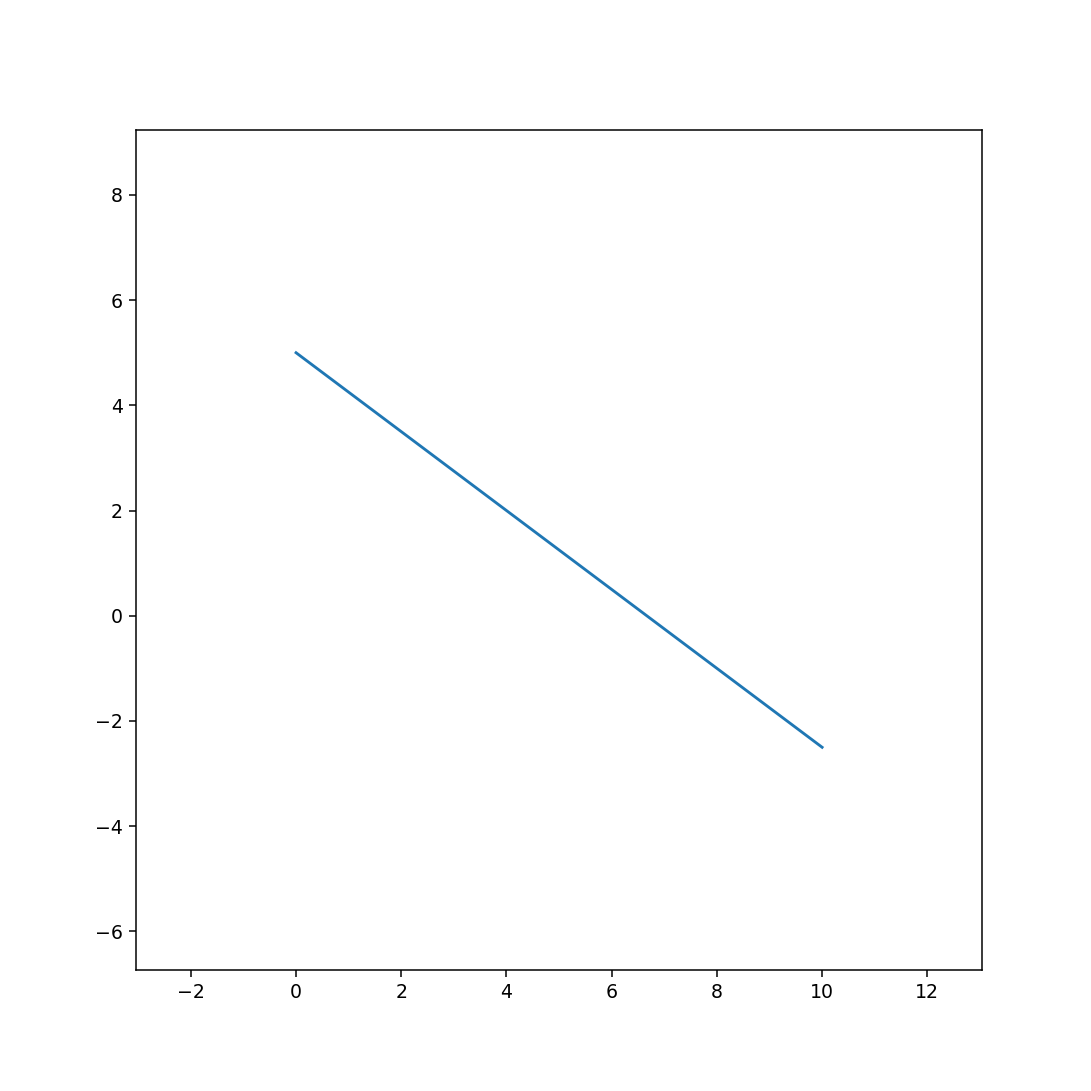

In [21]:
### 1. Self Study Exercise 1

start = 0
stop = 10
a = 3
b = 4
c = 20

x = np.linspace(start, stop, num=50)

# Linear equation is ax + by = c, thus y = ax ...

y = (c - a*x)/b
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.plot(x,y)
plt.show()

___
### 1. Self Study Exercise 2

Describe what you think linearly means geometrically when we are dealing with linear equations with more than two variables.

Assign the answer as a string to variable `q_1_2`

In [22]:
### 1. Self Study Exercise 2

q_1_2 = 'When we are dealing with linear equations with more than two variables '
q_1_2 += 'I think linearly means geometrically that If there are n variables '
q_1_2 += 'then an n-dimensional space is defined and an n-parameter linear '
q_1_2 += 'equation is represented by a straight line in n-dimensional space'

As we shall see in more detail below, we can write a system of linear equations in matrix notation as:

$$\m{Ax} = \m{y}\tag{1}$$

Where $\m{A}$ is a matrix and $\m{x},\m{y}$ are vectors. 

Three types of problems in linear algebra are:

___

1) Given $\m{A}$ and $\m{y}$, find $\m{x}$

this is the *solution of linear equations* discussed in [Notebook 3](3_Solution_of_Linear_Equations.ipynb). $\m{A}$ is interpreted as a *coefficient matrix*.

___
    
2) Given $\m{A}$ and $\m{x}$, find $\m{y}$

this is the determination of *linear transformations* discussed in [Notebook 4](4_Linear_Transformations.ipynb). $\m{A}$ is interpreted as a known *transformation matrix*.

___
    
3) Given $\m{x}$ and $\m{y}$ (and some special conditions), find $\m{A}$

this is also a *linear transformations* problem. This time with $\m{A}$ as an *unknown* transformation matrix.


___
### 1. Self Study Exercise 3

Why do you think "some special conditions" are required if we want to determine a transformation matrix $\m{A}$, given $\m{x}$ and $\m{y}$

Assign the answer as a string to variable `q_1_3`

In [23]:
### 1. Self Study Exercise 3

q_1_3 = 'I think "some special conditions" are required if we want to determine'
q_1_3 += 'a transformation matrix 𝐀, given 𝐱 and 𝐲 because ...'

In surveying our problems are usually non-linear. However, it is possible to tap into the powerful tools of linear algebra by a process of *linearization, correction*, and *iteration* discussed in [Notebook 5](5_Solution_of_Nonlinear_Equations.ipynb), in order to solve non-linear equations.

In mapping we deal with *deterministic* and *statistical* relationships. Deterministic relationships between variables, when linearized, can be represented by a *design (coefficient or Jakobian) matrix* (as in the solution of linear equations). Statistical relationships between variables can be represented by a *covariance (transformation) matrix* (as in linear transformations). Hence we are interested in both these aspects of linear algebra.

Before discussing the solution of linear and non-linear equations and linear transformations, we first review some definitions and the algebra of matrices.

___
### 1.1 Definitions

We will be dealing with scalars, vectors, and matrices. We will denote a scalar by a plain-text lower case cursive letter e.g. $a$, $x$; a vector by a bold lower-case letter e.g., $\m{a}$, $\m{x}$; and, a matrix by a bold upper-case letter e.g., $\m{A}$, $\m{X}$.

***Scalars*** may be either real or complex numbers. We will only be considering real numbers in these notes. A ***scalar function*** is a function (possibly of something that is not a scalar) whose value is a scalar. For example the length of a vector is a scalar function of something (a vector) which is not a scalar; $\sin{\theta}$ is a scalar function of a scalar ($\theta$). 

___
### 1.1 Self Study Exercise 4

a) Give an example of scalar functions whose arguments are scalars
b) Give a further example of scalar functions whose arguments are not scalars
c) Give an example of scalar functions whose argument is a matrix

In [24]:
### 1.1 Self Study Exercise 4

q_1_4_a = 'An example of scalar functions whose arguments are scalars is ...'
q_1_4_b = 'A further example of scalar functions whose arguments are not scalars is ...'

A ***Matrix*** is a two-dimensional (rectangular) array of *scalars* or *scalar functions*. The *scalars* or *scalar functions* or scalar functions making up this array are the ***elements*** of the matrix. The position of an element in the array is denoted by a double subscript, the first indicating which ***row***, and the second indicating which ***column*** the element is located. The matrix symbol itself may be subscripted to indicate the row and column dimensions of the array i.e., the total number of rows and columns. These dimensions are the order of the matrix.

For example:

$$_m\m{A}_n=\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{pmatrix}\tag{2}$$

is a matrix with $m$ rows and $n$ columns ($A$ has ***order*** $m\times n$), and $a_{ij}$ is the element at the intersection of row $i$ with column $j$.

___
### 1.1 Self Study Exercise 5

a) Give an example of scalar functions whose argument is a matrix
b) Is it possible for a matrix to have elements which are vectors, or even other matrices?
c) If your answer to 5.c was yes, how can this be reconciled with the sentence in the paragraph above defining what a matrix is? 

In [25]:
### 1.1 Self Study Exercise 5

q_1_5_a = ''
q_1_5_b = ''

A ***vector*** can be considered to be a matrix having only one row (a *row vector*) or one column (a *column vector*). In these notes vectors will be column vectors by default, unless otherwise designated. Vectors thus obey all rules of matrix algebra. However, since they are a special kind of matrix, there are extra rules of vector algebra. 

An example of a column vector is :

$$_m\m{A}_n=\begin{pmatrix}
a_{1}\\
a_{2}\\
\vdots\\
a_{n}
\end{pmatrix}\tag{3}$$

which has $n$ scalar elements $x_i$, where $i$ is the row index.


___
## 1.1 Self Study Exercise 6

if $\sin\theta$ is a scalar, what is $\sin\theta_i$, where $\theta_i\in\left [ 0^{\circ}, 5^{\circ}, \cdots, 90^{\circ}\right ]$

In [17]:
### 1.1 Self Study Exercise 5

q_1_5_a = ''
q_1_5_b = ''

___
## 1.2 Matrices as Data Containers

<a id='1_2_Matrices_as_Data_Containers'></a>

We can use matrices as data repositories. For example we will define $n$ column vectors describing vertices $\m{v}_i,i\in \mathopen[0\dots n\mathclose)$. These vertices, when connected, describe a simple boat shape and we may capture them as a polygon in matrix $\m{B}$ represented by variable B:

$$\m{v}_1=\col{-2}{-6}, \m{v}_2=\col{-2}{-4}, \m{v}_3=\col{0}{6}, \m{v}_4=\col{2}{4}, \m{v}_5=\col{2}{-6}$$

$$\m{B} = \left(\begin{array}{c|c|c|c|c}\m{v}_1&\m{v}_2&\m{v}_3&\m{v}_4&\m{v}_5\end{array}\right) = \begin{pmatrix}-2&-2&0&2&2\\-6&4&6&4&-6\end{pmatrix}$$

We may code this in Python, and then visualize it in an appropriate manner:

Matrix B holds a polygon defining a boat shape


<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


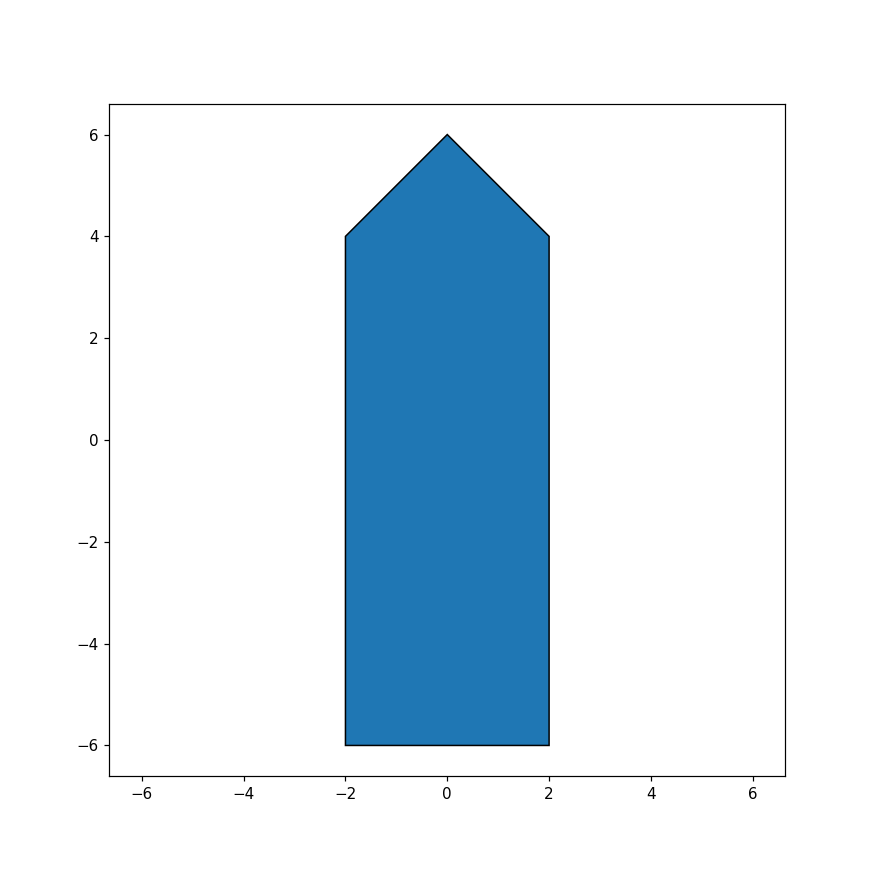

In [18]:
B = np.asarray([[-2, -2, 0, 2, 2],[-6, 4, 6, 4, -6]])
print('Matrix B holds a polygon defining a boat shape')
display_matrix(B)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k')
plt.show()


The code cell above then illustrates how a matrix can be used as an organized data container, which if we understand its organization, may be used in computations and visualizations.

___
## 1.2 Self Study Exercise 1

<a id='1_2_Self_Study_Exercise_1'></a>

In the `my_code` folder you will find the file `boat.py`; update the function `boat()` contained within this file so that it returns a `numpy` array holding the vertices of a boat identical to those in matrix $\m{B}$  the example above. The result should be that the code cell below produces the exact same output as the code cell above.

Matrix B holds a polygon defining a boat shape


<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


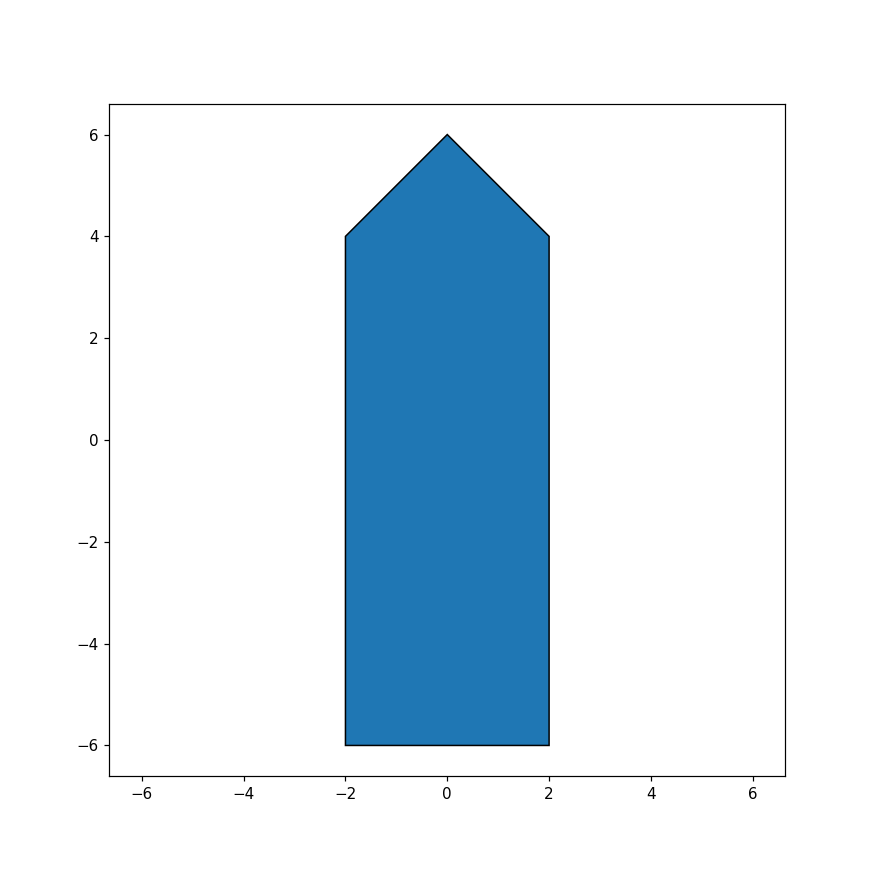

In [19]:
B = boat()
print('Matrix B holds a polygon defining a boat shape')
display_matrix(B)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k')
plt.show()


___
## Jump to Chapter

[2: Matrix Algebra.ipynb](2_Matrix_Algebra.ipynb)<br>
[3: Solution_of_Linear_Equations](3_Solution_of_Linear_Equations.ipynb)<br>
[4: Linear Transformations](4_Linear_Transformations.ipynb)<br>
[5: Solution of Nonlinear Equations](5_Solution_of_Nonlinear_Equations.ipynb)<br>

___
## Useful Resources

[Gilbert Strang MIT video lecture series](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/video_galleries/video-lectures/)

___
#### Copyright 2022, Semme J. Dijkstra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.